<a href="https://colab.research.google.com/github/karman07/thapar_summer_school/blob/master/kaggle_dataset_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://www.kaggle.com/competitions/summer-school-hack-i/overview

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"karmansingharora","key":"b2c7d6d6c7040478069b124b29826435"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install -q kaggle

In [ ]:
!kaggle competitions download -c summer-school-hack-i

  0% 0.00/615k [00:00<?, ?B/s]
100% 615k/615k [00:00<00:00, 605MB/s]


In [ ]:
!unzip -q summer-school-hack-i.zip

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/train.csv")

In [ ]:
df.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f12,f13,f14,f15,f16,f17,f18,f19,f20,target
0,52.843,66.492,57.300,25.224,39.213,56.593,27.157,67.453,55.690,36.504,...,46.375,78.489,36.789,55.797,43.135,37.513,64.094,43.039,42.852,148.76994
1,50.478,53.147,46.412,38.045,52.160,50.398,60.157,44.022,48.668,45.512,...,61.904,46.994,35.492,55.057,43.859,54.722,51.982,43.310,46.613,152.01250
2,16.432,30.201,43.268,76.786,58.864,24.046,46.519,63.948,50.190,65.539,...,27.011,26.714,66.842,32.628,47.996,75.920,24.627,56.853,65.180,141.96694
3,39.355,33.501,76.737,57.453,58.991,49.938,42.713,71.836,47.394,64.772,...,44.349,45.166,85.341,32.967,26.003,40.192,41.518,74.502,37.807,152.49692
4,30.337,62.905,70.896,35.969,45.878,56.114,45.075,61.684,58.865,41.360,...,45.491,65.265,48.155,49.756,48.782,44.316,43.562,41.068,52.805,149.01620


In [ ]:
df.columns

Index(['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11',
       'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20',
       'target'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression

In [ ]:
print("Shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)

Shape: (5000, 21)

Missing values:
 f1        0
f2        0
f3        0
f4        0
f5        0
f6        0
f7        0
f8        0
f9        0
f10       0
f11       0
f12       0
f13       0
f14       0
f15       0
f16       0
f17       0
f18       0
f19       0
f20       0
target    0
dtype: int64

Data types:
 f1        float64
f2        float64
f3        float64
f4        float64
f5        float64
f6        float64
f7        float64
f8        float64
f9        float64
f10       float64
f11       float64
f12       float64
f13       float64
f14       float64
f15       float64
f16       float64
f17       float64
f18       float64
f19       float64
f20       float64
target    float64
dtype: object


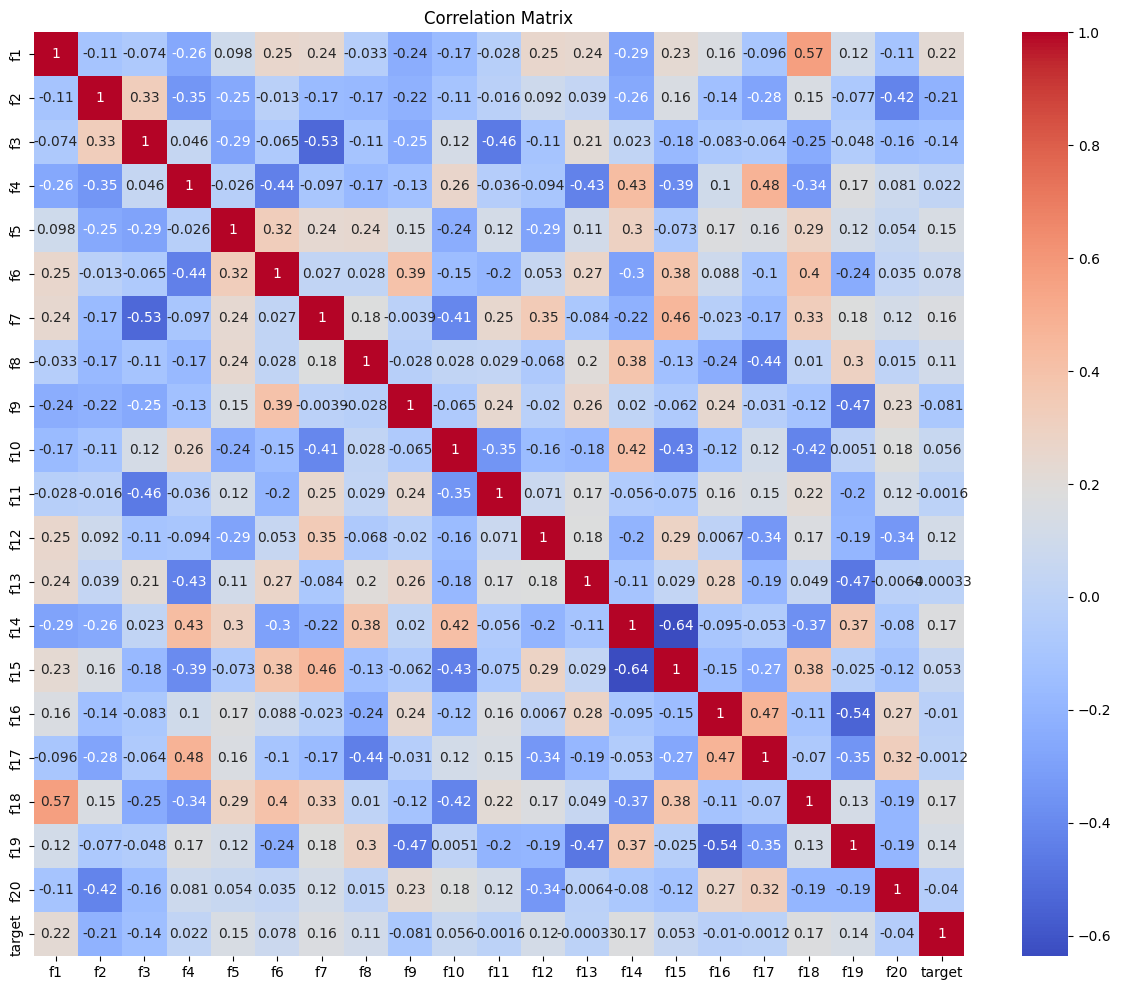

In [ ]:
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

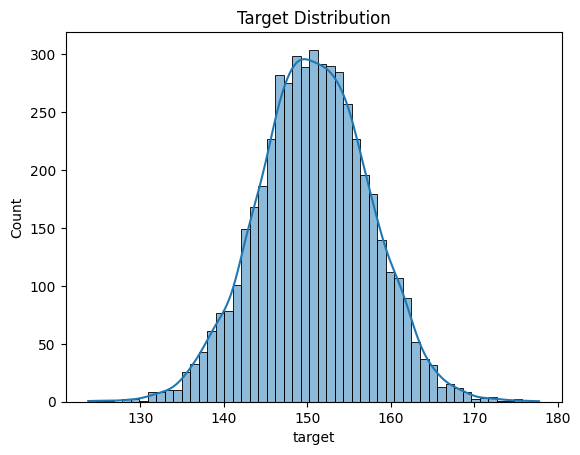

In [ ]:
sns.histplot(df['target'], kde=True)
plt.title("Target Distribution")
plt.show()

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled)

print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.2225129567281422
RMSE: 5.711033024975811


In [ ]:
pca = PCA()
pca.fit(X_train_scaled)

PCA()

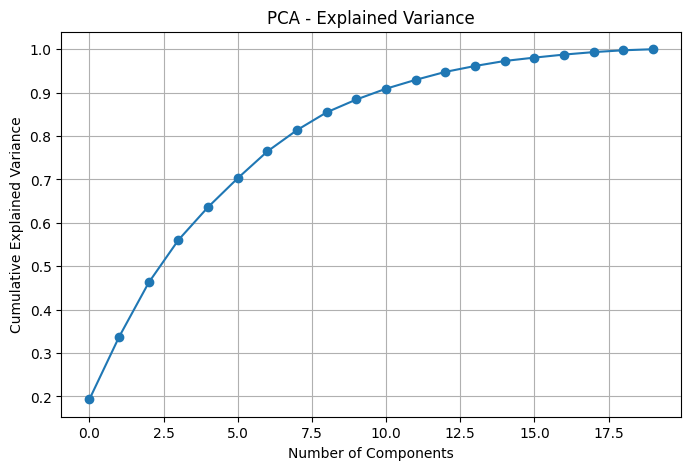

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance')
plt.grid()
plt.show()

In [ ]:
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

lr_pca = LinearRegression()
lr_pca.fit(X_train_pca, y_train)

y_pred_pca = lr_pca.predict(X_test_pca)

print("PCA R2 Score:", r2_score(y_test, y_pred_pca))
print("PCA RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_pca)))

PCA R2 Score: 0.14247318605292592
PCA RMSE: 5.997799529850747


In [ ]:
selector = SelectKBest(score_func=f_regression, k=10)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

lr_fs = LinearRegression()
lr_fs.fit(X_train_selected, y_train)

y_pred_fs = lr_fs.predict(X_test_selected)

print("FS R2 Score:", r2_score(y_test, y_pred_fs))
print("FS RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_fs)))


FS R2 Score: 0.16066629813631728
FS RMSE: 5.933834404205405


In [ ]:
from sklearn.impute import SimpleImputer
from scipy.stats import zscore

In [ ]:
print("Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
df.describe()

Shape: (5000, 21)

Missing Values:
 f1        0
f2        0
f3        0
f4        0
f5        0
f6        0
f7        0
f8        0
f9        0
f10       0
f11       0
f12       0
f13       0
f14       0
f15       0
f16       0
f17       0
f18       0
f19       0
f20       0
target    0
dtype: int64


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f12,f13,f14,f15,f16,f17,f18,f19,f20,target
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,46.698872,45.801463,48.094232,44.468013,50.667154,48.512839,52.630687,55.651990,51.721884,46.760628,...,49.714644,48.902636,50.096995,54.255311,45.752170,51.946271,47.748071,53.668650,48.388950,150.814998
std,13.289450,9.813469,11.402981,11.016654,11.344568,11.588421,12.017262,11.245779,10.193929,12.002280,...,9.950373,11.425209,14.809340,12.532113,9.567944,11.379881,13.012365,11.705848,9.256078,6.698359
min,6.840000,12.002000,13.298000,7.323000,6.686000,9.149000,5.257000,7.937000,7.637000,9.942000,...,16.730000,11.270000,7.739000,11.702000,9.248000,11.567000,0.155000,15.743000,3.419000,123.777540
25%,37.172500,39.167750,40.308500,36.942500,43.241250,40.422500,44.684500,48.388750,44.841750,38.364000,...,43.030750,41.144500,39.242250,45.788500,39.266750,43.920000,38.880000,45.220500,42.138500,146.420845
50%,46.903000,45.839000,47.775000,44.493500,51.040500,48.582500,53.196500,56.033000,51.781500,46.083000,...,49.801000,48.988000,50.047000,54.723000,45.767500,51.500000,47.743000,53.638000,48.350000,150.758330
75%,56.013250,52.254500,55.543000,52.002750,58.567000,56.350250,61.151500,63.296250,58.445250,54.517500,...,56.248250,56.279500,60.655250,63.191750,52.057000,59.479250,56.946750,61.952500,54.521000,155.280050
max,94.306000,100.000000,88.591000,79.614000,96.941000,86.900000,89.096000,93.066000,87.121000,95.320000,...,100.000000,95.823000,93.294000,92.510000,86.451000,95.233000,91.331000,93.582000,81.779000,177.768260


In [ ]:
z_scores = np.abs(zscore(X))
X_clean = X[(z_scores < 3).all(axis=1)]
y_clean = y[X_clean.index]

print("After removing outliers:", X_clean.shape)

After removing outliers: (4791, 20)


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_clean, test_size=0.2, random_state=42)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
X_df = pd.DataFrame(X_scaled, columns=[f'f{i}' for i in range(1, 21)])
vif_data = pd.DataFrame()
vif_data["Feature"] = X_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]

print(vif_data)

   Feature       VIF
0       f1  3.819497
1       f2  3.416553
2       f3  3.099334
3       f4  3.144022
4       f5  3.313638
5       f6  3.663180
6       f7  3.611738
7       f8  2.693418
8       f9  4.124998
9      f10  3.051013
10     f11  2.842973
11     f12  3.727522
12     f13  3.075981
13     f14  5.459283
14     f15  3.619355
15     f16  2.898360
16     f17  7.115935
17     f18  3.723159
18     f19  6.852191
19     f20  2.463432


In [ ]:
!pip install xgboost catboost lightgbm optuna --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 14.3 MB/s eta 0:00:00


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Linear Regression R2 Score:", r2_score(y_test, y_pred_lr))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

Linear Regression R2 Score: 0.24462300039192342
Linear Regression RMSE: 5.780666941859945


In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

print("XGBoost R2 Score:", r2_score(y_test, y_pred_xgb))
print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))

XGBoost R2 Score: 0.35273710886471954
XGBoost RMSE: 5.351018146578732


In [ ]:
from catboost import CatBoostRegressor

cat = CatBoostRegressor(verbose=0, random_state=42)
cat.fit(X_train, y_train)

y_pred_cat = cat.predict(X_test)

print("CatBoost R2 Score:", r2_score(y_test, y_pred_cat))
print("CatBoost RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_cat)))


CatBoost R2 Score: 0.4094358928723467
CatBoost RMSE: 5.111279068862332


In [ ]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(random_state=42)
lgbm.fit(X_train, y_train)

y_pred_lgbm = lgbm.predict(X_test)

print("LightGBM R2 Score:", r2_score(y_test, y_pred_lgbm))
print("LightGBM RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lgbm)))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002349 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 3832, number of used features: 20
[LightGBM] [Info] Start training from score 150.782413
LightGBM R2 Score: 0.3939311863184787
LightGBM RMSE: 5.177940289792414


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
import optuna

def objective_xgb(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 1),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 1),
        'random_state': 42
    }

    model = XGBRegressor(**params)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    return mean_squared_error(y_test, pred)

In [ ]:
study_xgb = optuna.create_study(direction="minimize")
study_xgb.optimize(objective_xgb, n_trials=50)

print("Best params for XGBoost:", study_xgb.best_params)
print("Best RMSE:", np.sqrt(study_xgb.best_value))

[I 2025-07-07 02:53:41,192] A new study created in memory with name: no-name-1a9bba8c-8ca3-4dbf-bef4-e27449d8ed25
[I 2025-07-07 02:53:46,184] Trial 0 finished with value: 34.45015831525355 and parameters: {'max_depth': 9, 'learning_rate': 0.2862417506486853, 'n_estimators': 910, 'subsample': 0.565322288105228, 'colsample_bytree': 0.6155414877281995, 'gamma': 4.667066820147414, 'reg_alpha': 0.4199720332892196, 'reg_lambda': 0.05366917994536813}. Best is trial 0 with value: 34.45015831525355.
[I 2025-07-07 02:53:49,272] Trial 1 finished with value: 27.387543841050498 and parameters: {'max_depth': 8, 'learning_rate': 0.14824658714735545, 'n_estimators': 897, 'subsample': 0.5600147559628574, 'colsample_bytree': 0.9419340169961262, 'gamma': 1.6725068165413148, 'reg_alpha': 0.8600723502263989, 'reg_lambda': 0.9841686989287068}. Best is trial 1 with value: 27.387543841050498.
[I 2025-07-07 02:53:52,844] Trial 2 finished with value: 30.14036256496209 and parameters: {'max_depth': 8, 'learning_

Best params for XGBoost: {'max_depth': 4, 'learning_rate': 0.053033230033184955, 'n_estimators': 663, 'subsample': 0.9239594766708951, 'colsample_bytree': 0.5644328512419738, 'gamma': 4.0512457525330205, 'reg_alpha': 0.16538483566313233, 'reg_lambda': 0.21883101523507312}
Best RMSE: 5.143049014257012


In [ ]:
best_xgb = XGBRegressor(**study_xgb.best_params)
best_xgb.fit(X_train, y_train)
y_pred_best = best_xgb.predict(X_test)

print("Final XGBoost R2:", r2_score(y_test, y_pred_best))
print("Final XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best)))

Final XGBoost R2: 0.3984982054405056
Final XGBoost RMSE: 5.158394266540265


In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

In [ ]:
def objective_stack(trial):
    xgb_params = {
        'max_depth': trial.suggest_int('xgb_max_depth', 3, 8),
        'learning_rate': trial.suggest_float('xgb_lr', 0.01, 0.3),
        'n_estimators': trial.suggest_int('xgb_n_estimators', 100, 500),
        'subsample': trial.suggest_float('xgb_subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('xgb_colsample', 0.6, 1.0),
        'random_state': 42
    }

    lgb_params = {
        'max_depth': trial.suggest_int('lgb_max_depth', 3, 8),
        'learning_rate': trial.suggest_float('lgb_lr', 0.01, 0.3),
        'n_estimators': trial.suggest_int('lgb_n_estimators', 100, 500),
        'subsample': trial.suggest_float('lgb_subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('lgb_colsample', 0.6, 1.0),
        'random_state': 42
    }

    cat_params = {
        'depth': trial.suggest_int('cat_depth', 3, 8),
        'learning_rate': trial.suggest_float('cat_lr', 0.01, 0.3),
        'iterations': trial.suggest_int('cat_iterations', 100, 500),
        'random_seed': 42,
        'verbose': 0
    }

    xgb = XGBRegressor(**xgb_params)
    lgb = LGBMRegressor(**lgb_params)
    cat = CatBoostRegressor(**cat_params)


    meta = Ridge()

    stack = StackingRegressor(
        estimators=[('xgb', xgb), ('lgb', lgb), ('cat', cat)],
        final_estimator=meta,
        passthrough=True,
        n_jobs=-1
    )

    stack.fit(X_train, y_train)
    preds = stack.predict(X_test)
    return mean_squared_error(y_test, preds)


In [ ]:
study_stack = optuna.create_study(direction='minimize')
study_stack.optimize(objective_stack, n_trials=25)

print("Best parameters from Optuna for StackingRegressor:")
for k, v in study_stack.best_params.items():
    print(f"{k}: {v}")

print("Best RMSE:", np.sqrt(study_stack.best_value))

[I 2025-07-07 02:57:34,942] A new study created in memory with name: no-name-74d1aaea-c9ac-4050-abe5-0dd72436454b
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-07-07 02:58:11,900] Trial 0 finished with value: 25.823584676767023 and parameters: {'xgb_max_depth': 7, 'xgb_lr': 0.09231262940701815, 'xgb_n_estimators': 272, 'xgb_subsample': 0.6446802506378279, 'xgb_colsample': 0.6794152146395263, 'lgb_max_depth': 3, 'lgb_lr': 0.23629938071049345, 'lgb_n_estimators': 457, 'lgb_subsample': 0.9701239065982089, 'lgb_colsample': 0.9293024306534174, 'cat_depth': 6, 'cat_lr': 0.1379576705598867, 'cat_iterations': 224}. Best is trial 0 with value: 25.823584676767023.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  

Best parameters from Optuna for StackingRegressor:
xgb_max_depth: 7
xgb_lr: 0.09790503445601259
xgb_n_estimators: 179
xgb_subsample: 0.9084918074218017
xgb_colsample: 0.7012849085260605
lgb_max_depth: 3
lgb_lr: 0.24949136623689158
lgb_n_estimators: 421
lgb_subsample: 0.9396185284857272
lgb_colsample: 0.9327543719480927
cat_depth: 6
cat_lr: 0.13634490432756247
cat_iterations: 265
Best RMSE: 5.063283422891291


In [43]:
bp = study_stack.best_params

xgb_best = XGBRegressor(
    max_depth=bp['xgb_max_depth'],
    learning_rate=bp['xgb_lr'],
    n_estimators=bp['xgb_n_estimators'],
    subsample=bp['xgb_subsample'],
    colsample_bytree=bp['xgb_colsample'],
    random_state=42
)

lgb_best = LGBMRegressor(
    max_depth=bp['lgb_max_depth'],
    learning_rate=bp['lgb_lr'],
    n_estimators=bp['lgb_n_estimators'],
    subsample=bp['lgb_subsample'],
    colsample_bytree=bp['lgb_colsample'],
    random_state=42
)

cat_best = CatBoostRegressor(
    depth=bp['cat_depth'],
    learning_rate=bp['cat_lr'],
    iterations=bp['cat_iterations'],
    random_seed=42,
    verbose=0
)

meta_learner = Ridge()

final_stack = StackingRegressor(
    estimators=[('xgb', xgb_best), ('lgb', lgb_best), ('cat', cat_best)],
    final_estimator=meta_learner,
    passthrough=True,
    n_jobs=-1
)

final_stack.fit(X_train, y_train)
y_pred_stack = final_stack.predict(X_test)

print("Stacking Regressor R2:", r2_score(y_test, y_pred_stack))
print("Stacking Regressor RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_stack)))


Stacking Regressor R2: 0.4204747838953792
Stacking Regressor RMSE: 5.063283422891291


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [44]:
# submission = pd.DataFrame({"id": test_df["id"], "target": predictions})
# submission.to_csv("Submission.csv", index=False)
# print("Karman_Singh_2023362.csv created!")
